In [1]:
import os
import random
import numpy as np
import scipy.io
import cv2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.utils import to_categorical
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,f1_score

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2022-05-01 17:35:12--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz [following]
--2022-05-01 17:35:13--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  28.5MB/s    in 12s     

2022-05-01 17:35:25 (26.8 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2022-05-01 17:35:30--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.

In [3]:
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [4]:
images = list()
labels = list()
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  labels.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (70,70))
  images.append(resized)


In [5]:
for i in range(0,len(labels)):
  labels[i]=int(labels[i])

In [6]:
new_label = Counter(labels)
ind = list()
for i in range(len(new_label)):
  if(new_label[i]>=100):
    ind.append(i)

In [ ]:
len(ind)

23

In [7]:
IMG = list()
LAB = list()
i=0
while(i<102):
  # extracting data of each class separately
  l=list()
  p=list()
  for j in range(0,len(labels)):
    if(labels[j]==i):
      l.append(images[j])
      p.append(labels[j])
  IMG.append(l)
  LAB.append(p)
  i+=1


In [8]:
lab=list()
c_ind=0
p=0
for i in ind:
  c_ind+=1
  for j in LAB[i]:
    lab.append(p)
  p+=1
img1=list()
c_ind=0
for i in ind:
  c_ind+=1
  for j in  IMG[i]:
    img1.append(j)


In [ ]:
Counter(lab)

Counter({0: 108,
         1: 127,
         2: 130,
         3: 196,
         4: 258,
         5: 109,
         6: 114,
         7: 109,
         8: 102,
         9: 194,
         10: 171,
         11: 120,
         12: 107,
         13: 251,
         14: 137,
         15: 105,
         16: 166,
         17: 112,
         18: 131,
         19: 154,
         20: 184,
         21: 162,
         22: 128})

In [9]:
train_temp_x, test_x, train_temp_y, test_y = train_test_split(img1,lab,stratify=lab, test_size=0.2,random_state=1)

do not run

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_temp_x,train_temp_y,stratify=train_temp_y, test_size=0.2,random_state=1)

In [10]:
train_x = (np.asarray(train_temp_x))/255
test_x = (np.asarray(test_x))/255
#val_x = (np.asarray(val_x))/255

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

In [12]:
model = VGG16(weights="imagenet", include_top=False, input_shape=train_x[0].shape)
model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 70, 70, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 70, 70, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 70, 70, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 35, 35, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 35, 35, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 35, 35, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 17, 17, 128)       0     

In [13]:
from keras.utils import np_utils

train_y=np.asarray(train_temp_y)    
train_y = np_utils.to_categorical(train_y,num_classes=23)

test_y=np.asarray(test_y)  
test_y= np_utils.to_categorical(test_y,num_classes=23)


In [14]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(120, activation='relu')
dense_layer_2 = layers.Dense(100, activation='relu')
dense_layer_3 = layers.Dense(80, activation='relu')
dense_layer_4 = layers.Dense(60, activation='relu')
prediction_layer = layers.Dense(23, activation='softmax')



model_ = models.Sequential([
    model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    prediction_layer
])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_acc', mode='max', patience=5,  restore_best_weights=True)


In [17]:
transfer_learning_model=model_.fit(train_x, train_y, epochs=50,steps_per_epoch=84, validation_split=0.2, batch_size=30, callbacks=[es])

Train on 84 samples, validate on 540 samples
Epoch 1/50
84/84 [==============================] - ETA: 0s - batch: 41.5000 - size: 1.0000 - loss: 2.7331 - acc: 0.2468

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


84/84 [==============================] - 207s 2s/step - batch: 41.5000 - size: 1.0000 - loss: 2.7331 - acc: 0.2468 - val_loss: 2.1855 - val_acc: 0.4130
Epoch 2/50
84/84 [==============================] - 206s 2s/step - batch: 41.5000 - size: 1.0000 - loss: 1.4185 - acc: 0.6507 - val_loss: 1.2218 - val_acc: 0.6648
Epoch 3/50
84/84 [==============================] - 206s 2s/step - batch: 41.5000 - size: 1.0000 - loss: 0.6443 - acc: 0.8520 - val_loss: 0.9520 - val_acc: 0.7093
Epoch 4/50
84/84 [==============================] - 206s 2s/step - batch: 41.5000 - size: 1.0000 - loss: 0.3166 - acc: 0.9430 - val_loss: 0.8831 - val_acc: 0.7444
Epoch 5/50
84/84 [==============================] - 206s 2s/step - batch: 41.5000 - size: 1.0000 - loss: 0.1510 - acc: 0.9872 - val_loss: 0.8885 - val_acc: 0.7500
Epoch 6/50
84/84 [==============================] - 206s 2s/step - batch: 41.5000 - size: 1.0000 - loss: 0.0728 - acc: 0.9986 - val_loss: 0.9250 - val_acc: 0.7537
Epoch 7/50
84/84 [===============

In [19]:
model_.evaluate(test_x,test_y)

[0.9388242677957923, 0.7585185]

In [20]:
y_predict = model_.predict(test_x)
predicted_classes = np.argmax(np.round(y_predict),axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [23]:
target_names = ["Class {}".format(i) for i in range(23)]
y=np.argmax(np.round(test_y),axis=1)
print(classification_report(y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.23      0.82      0.35        22
     Class 1       0.96      0.92      0.94        25
     Class 2       0.67      0.38      0.49        26
     Class 3       0.92      0.90      0.91        39
     Class 4       0.70      0.83      0.76        52
     Class 5       0.75      0.95      0.84        22
     Class 6       0.96      0.96      0.96        23
     Class 7       0.96      1.00      0.98        22
     Class 8       1.00      0.85      0.92        20
     Class 9       0.83      0.77      0.80        39
    Class 10       0.74      0.50      0.60        34
    Class 11       0.75      0.50      0.60        24
    Class 12       0.81      0.81      0.81        21
    Class 13       0.90      0.90      0.90        50
    Class 14       0.68      0.63      0.65        27
    Class 15       0.74      0.67      0.70        21
    Class 16       0.87      0.82      0.84        33
    Class 17       0.60    

<Figure size 432x288 with 0 Axes>

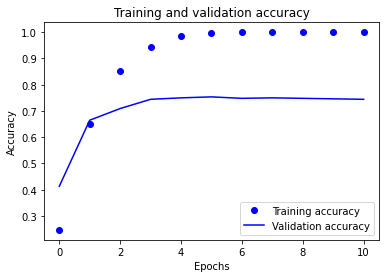

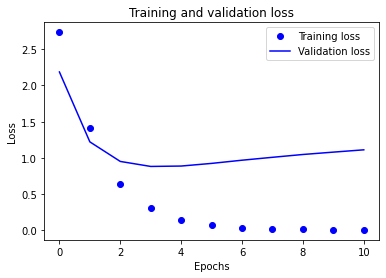

<Figure size 432x288 with 0 Axes>

In [24]:
accuracy = transfer_learning_model.history['acc']
val_accuracy = transfer_learning_model.history['val_acc']
loss = transfer_learning_model.history['loss']
val_loss = transfer_learning_model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and validation loss')
plt.legend()
plt.figure()